# Laplacian Eigenmaps on Swiss Roll Dataset

This notebook demonstrates Laplacian Eigenmaps, a nonlinear dimensionality reduction technique,
applied to the synthetic Swiss Roll dataset.


## 1. Setup and Imports


In [12]:
import sys
import os

sys.path.insert(0, "..")

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# from src import LaplacianEigenmaps, create_swiss_roll, plot_embedding
from src.laplacian_eigenmaps import LaplacianEigenmaps
from src.utils import create_swiss_roll, plot_embedding

## 2. Generate Swiss Roll Dataset

The Swiss Roll is a classic example of a 2D manifold embedded in 3D space.
It's useful for testing dimensionality reduction algorithms because the intrinsic
dimensionality is 2, but the data lives in 3D.


In [13]:
# Generate the Swiss Roll
n_samples = 4000
noise = 0.3
random_state = 42

X, colors = create_swiss_roll(
    n_samples=n_samples, noise=noise, random_state=random_state
)

print(f"Swiss Roll shape: {X.shape}")
print(f"Color values shape: {colors.shape}")

Swiss Roll shape: (4000, 3)
Color values shape: (4000,)


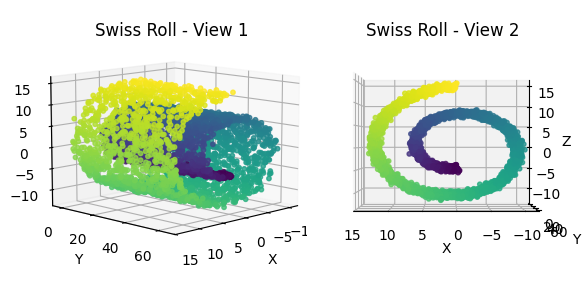

In [14]:
# Visualize the Swiss Roll in 3D
fig = plt.figure(figsize=(7, 5))

# View 1
ax1 = fig.add_subplot(121, projection="3d")
scatter = ax1.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=colors, cmap="viridis", s=10, alpha=0.8
)
ax1.set_title("Swiss Roll - View 1", y=0.95)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=10, azim=45)

# View 2 (different angle)
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, cmap="viridis", s=10, alpha=0.8)
ax2.set_title("Swiss Roll - View 2", y=0.95)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=0, azim=90)

plt.subplots_adjust(wspace=0)  # Remove space between subplots
plt.show()

## 3. Apply Laplacian Eigenmaps

Laplacian Eigenmaps works by:

1. Constructing a neighborhood graph (k-NN or epsilon-neighborhood)
2. Computing edge weights (e.g., using a Gaussian kernel)
3. Computing the graph Laplacian L = D - W
4. Finding the smallest non-trivial eigenvectors of the generalized eigenvalue problem


In [34]:
# Apply Laplacian Eigenmaps with different parameters
k, sigma = 15, 2.0
le = LaplacianEigenmaps(
    n_components=2, n_neighbors=k, weight="heat", sigma=sigma, random_state=42
)

embedding = le.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Embedding shape: {embedding.shape}")
print(f"Eigenvalues: {le.eigenvalues_}")

Original shape: (4000, 3)
Embedding shape: (4000, 2)
Eigenvalues: [0.00087854 0.00157465]


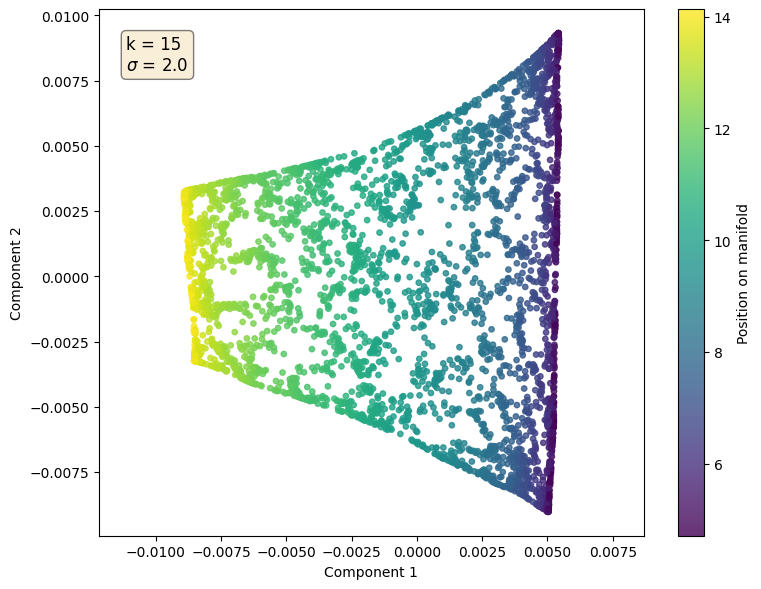

In [35]:
# Visualize the embedding
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(
    embedding[:, 0], embedding[:, 1], c=colors, cmap="viridis", s=15, alpha=0.8
)
# ax.set_title("Laplacian Eigenmaps Embedding of Swiss Roll", fontsize=14)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
plt.colorbar(scatter, label="Position on manifold")
# Add text box with parameters
params_text = f"k = {k}\n$\\sigma$ = {sigma}"
props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
ax.text(
    0.05,
    0.95,
    params_text,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=props,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

## 4. Effect of Parameters

Let's explore how different parameters affect the embedding.


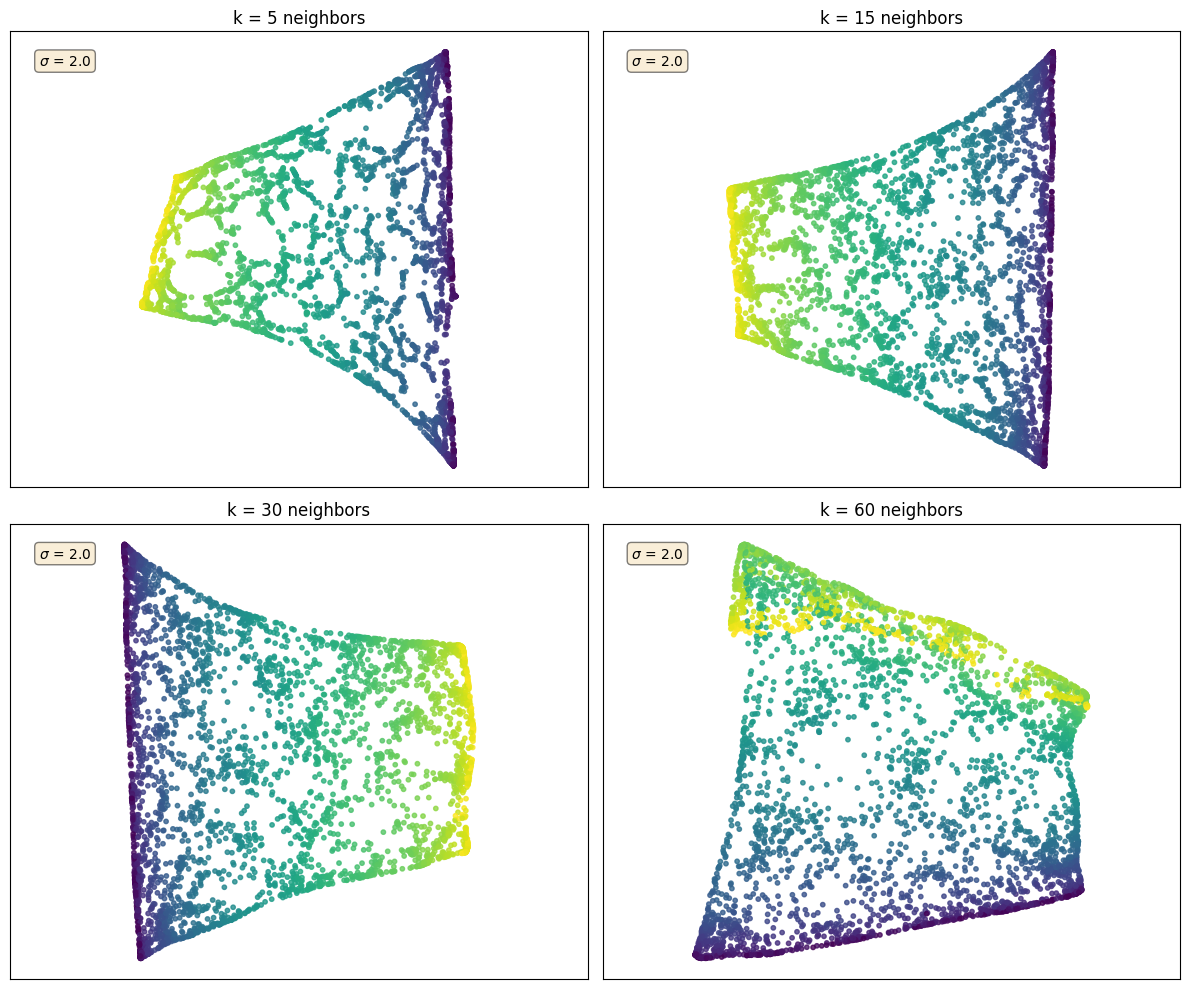

In [23]:
# Different number of neighbors
n_neighbors_list = [5, 15, 30, 60]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, k in zip(axes, n_neighbors_list):
    le = LaplacianEigenmaps(
        n_components=2, n_neighbors=k, weight="heat", sigma=2.0, random_state=42
    )
    emb = le.fit_transform(X)

    scatter = ax.scatter(
        emb[:, 0], emb[:, 1], c=colors, cmap="viridis", s=10, alpha=0.8
    )
    ax.set_title(f"k = {k} neighbors")
    # No ax labels and ticks for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    # text box with sigma
    params_text = "$\\sigma$ = 2.0"
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    ax.text(
        0.05,
        0.95,
        params_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=props,
    )
    ax.axis("equal")

# plt.suptitle("Effect of Number of Neighbors", fontsize=14, y=0.975)
plt.tight_layout()
plt.show()

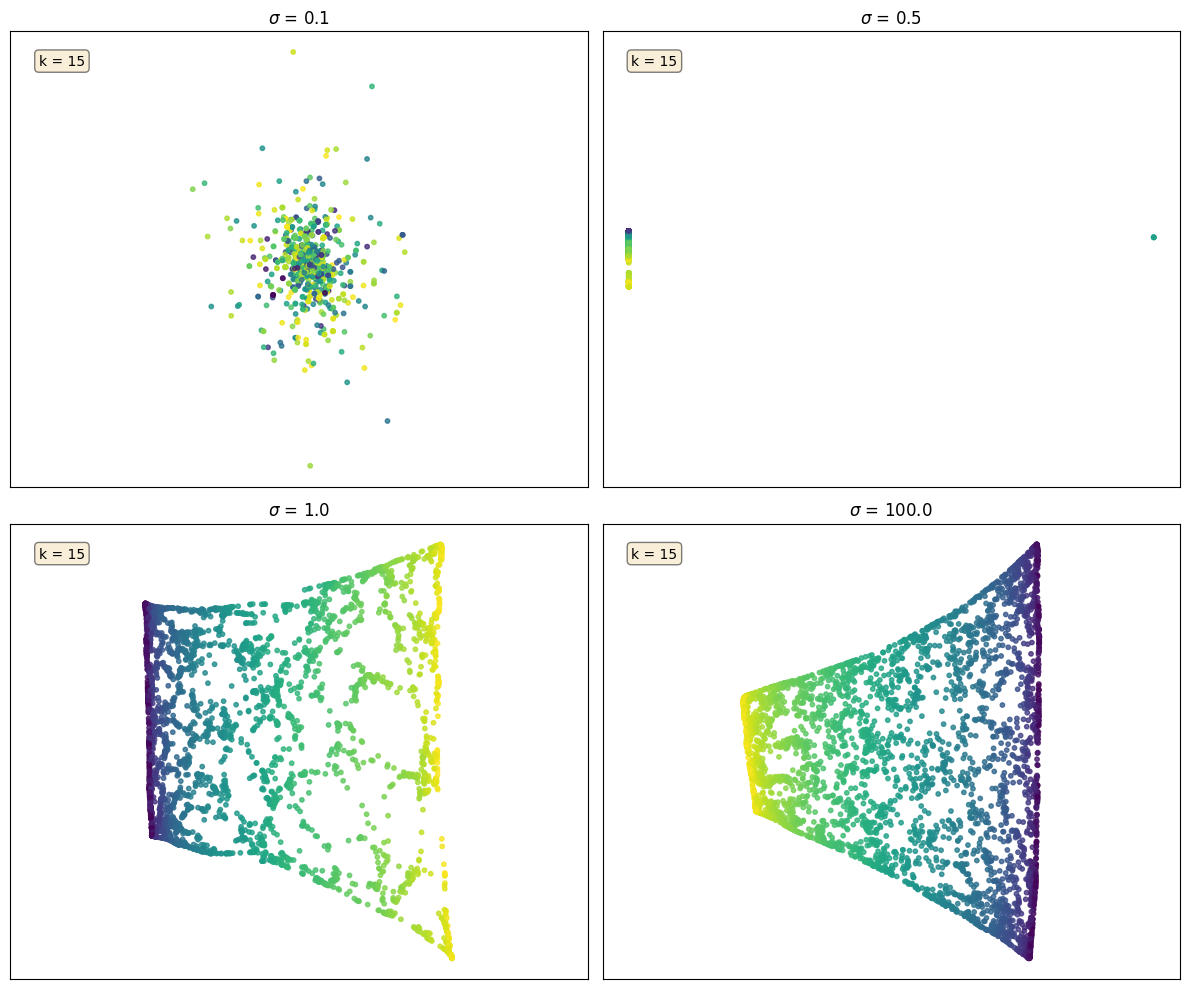

In [ ]:
# Different sigma values (bandwidth parameter)
# sigma_list = [0.9, 1.0, 2.0, 5.0]
sigma_list = [0.1, 0.5, 1.0, 100.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, sigma in zip(axes, sigma_list):
    le = LaplacianEigenmaps(
        n_components=2, n_neighbors=15, weight="heat", sigma=sigma, random_state=42
    )
    emb = le.fit_transform(X)

    scatter = ax.scatter(
        emb[:, 0], emb[:, 1], c=colors, cmap="viridis", s=10, alpha=0.8
    )
    # no ax labels and ticks for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

    # text box with k
    params_text = "k = 15"
    props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    ax.text(
        0.05,
        0.95,
        params_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=props,
    )

    ax.set_title(f"$\\sigma$ = {sigma}")
    ax.axis("equal")

# plt.suptitle("Effect of Sigma (Kernel Bandwidth)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 5. Compare with PCA

Let's compare Laplacian Eigenmaps with PCA, a linear dimensionality reduction method.


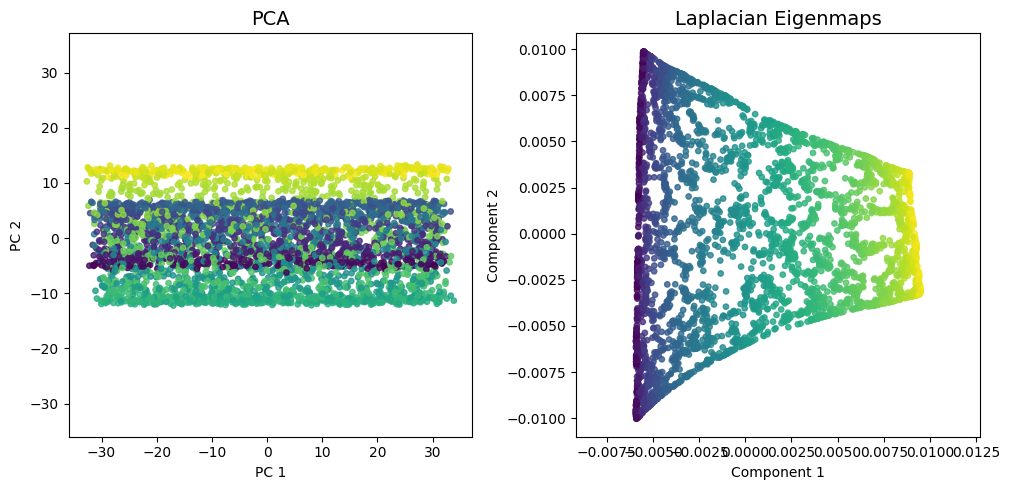

In [42]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_embedding = pca.fit_transform(X)

# Apply Laplacian Eigenmaps
le = LaplacianEigenmaps(
    n_components=2, n_neighbors=12, weight="heat", sigma=2.0, random_state=42
)
le_embedding = le.fit_transform(X)

# Compare
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# PCA
scatter1 = axes[0].scatter(
    pca_embedding[:, 0], pca_embedding[:, 1], c=colors, cmap="viridis", s=15, alpha=0.8
)
axes[0].set_title("PCA", fontsize=14)
axes[0].set_xlabel("PC 1")
axes[0].set_ylabel("PC 2")
axes[0].axis("equal")

# Laplacian Eigenmaps
scatter2 = axes[1].scatter(
    le_embedding[:, 0], le_embedding[:, 1], c=colors, cmap="viridis", s=15, alpha=0.8
)
axes[1].set_title("Laplacian Eigenmaps", fontsize=14)
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")
axes[1].axis("equal")

# plt.suptitle("PCA vs Laplacian Eigenmaps on Swiss Roll", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 6. Conclusion

As we can see, Laplacian Eigenmaps successfully "unrolls" the Swiss Roll,
revealing the underlying 2D manifold structure. In contrast, PCA, being a
linear method, cannot properly unfold the nonlinear structure.

Key observations:

- The color gradient in the Laplacian Eigenmaps embedding shows smooth transitions,
  indicating that nearby points in the original manifold remain nearby in the embedding.
- The choice of number of neighbors (k) and kernel bandwidth (sigma) affect the quality
  of the embedding.
